# Telecom Customer Churn Prediction

**Project by:** Wadhare Isaac  
**Date:** July 2025  
**Objective:** Predict customer churn using classification models and identify key drivers behind churn behavior for a telecom company.

---

## 1. Business Understanding

**Stakeholder**: SyriaTel, a telecommunications company.

**Business Problem**: SyriaTel is experiencing customer churn—clients who cancel their services. This leads to revenue loss and higher costs for acquiring new customers.

**Goal**: Build a binary classification model that predicts whether a customer is likely to churn soon. This can help SyriaTel take preventive action to retain high-risk customers.

**Target Variable**: `Churn` (Yes/No)

**Success Metric**: Prioritize **Recall**, as we want to catch as many customers likely to churn as possible—even at the cost of a few false positives.


## 2. Data Understanding

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, precision_recall_curve,
                             accuracy_score, precision_score, recall_score, f1_score)
from sklearn.feature_selection import SelectKBest, f_classif

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [24]:
df = pd.read_csv(r'Data\bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [25]:
# Check shape and data types
print(df.shape)
df.info()


(3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 

Our dataset has got 3333 columns and 21 rows without any missing values

We have three data types here:
- object: categorical (e.g. 'state', 'international plan')
- int/float: numerical
- bool: target column

In [26]:
# Check missing values
df.isnull().sum()

# Check balance of 'churn' column
df['churn'].value_counts(normalize=True)*100



churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

## 3. Data Preparation

In [27]:
#Drop the 'phone number' column as it is not useful for my analysis because its not a predictor
df.drop(columns=['phone number'], inplace=True)

#covert yes/no columns to binary
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# Convert categorical columns to numerical using one-hot encoding
#df = pd.get_dummies(df, columns=['state'], drop_first=True)

# Split into features and target
# X = df.drop(columns=['churn'])
# y = df['churn'].astype(int)




## 4. Eploratory Data Analysis
### Churn Distribution

Let’s explore the proportion of churned vs non-churned customers to check class imbalance.


   churn  proportion
0  False    0.855086
1   True    0.144914


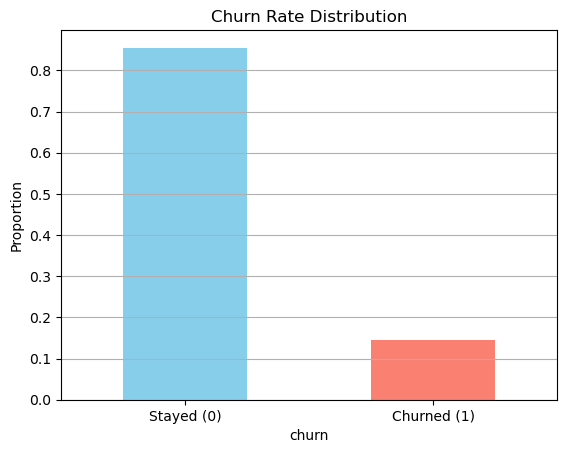

In [28]:
churn_dist = df['churn'].value_counts(normalize=True).rename_axis('churn').reset_index(name='proportion')
print(churn_dist)
churn_dist.plot(kind='bar', x='churn', y='proportion', legend=False, color=['skyblue', 'salmon'])
plt.title('Churn Rate Distribution')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Stayed (0)', 'Churned (1)'], rotation=0)
plt.grid(axis='y')
plt.show()


The bar labeled "Stayed (0)" shows a very high proportion — around 85% of the customers.

The bar labeled "Churned (1)" is much shorter — only about 15% of the customers.

Most customers in your dataset did not churn. Only a small percentage of customers actually left (churned). This is a class imbalance problem where a model can easily achieve high accuracy just by predicting everyone as “Stayed”.But it would fail to identify the few who churned, which are usually the most important to detect in real business cases.

### Feature Behavior by Churn Status

Here we compare means of numerical features for churned vs non-churned customers.
This helps spot patterns (e.g. churners call customer service more).


In [29]:
# Group by churn and get mean of numeric columns
churn_feature_means = df.groupby('churn').mean(numeric_only=True).T
churn_feature_means.columns = ['Stayed', 'Churned']
churn_feature_means['Difference'] = churn_feature_means['Churned'] - churn_feature_means['Stayed']
churn_feature_means.sort_values('Difference', ascending=False).head(10)


,Stayed,Churned,Difference
total day minutes,175.175754,206.914079,31.738324
total eve minutes,199.043298,212.410145,13.366847
total day charge,29.780421,35.175921,5.395500
total night minutes,200.133193,205.231677,5.098484
account length,100.793684,102.664596,1.870912
total eve charge,16.918909,18.054969,1.136060
total day calls,100.283158,101.335404,1.052246
customer service calls,1.449825,2.229814,0.779989
area code,437.074737,437.817805,0.743069
total intl minutes,10.158877,10.700000,0.541123


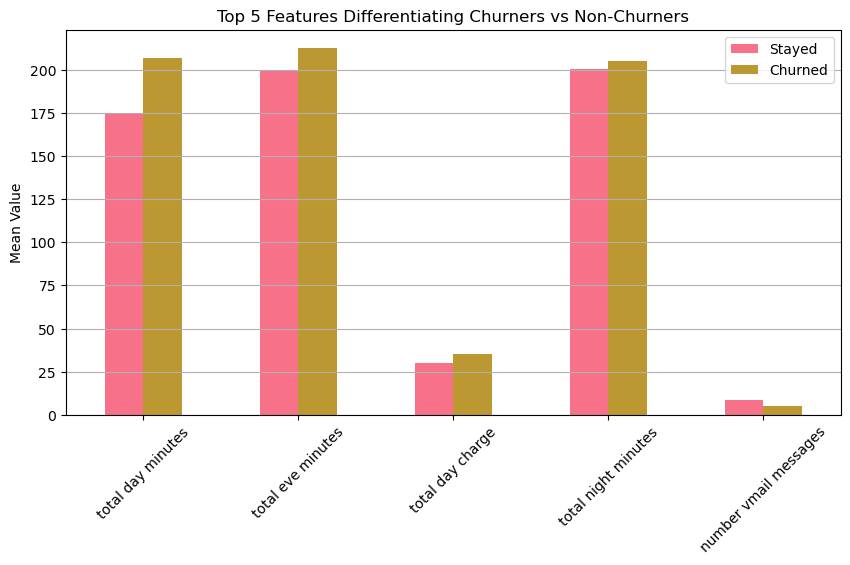

In [30]:
# Visualize top 5 features with the biggest difference
top_diff = churn_feature_means['Difference'].abs().sort_values(ascending=False).head(5).index
churn_feature_means.loc[top_diff][['Stayed', 'Churned']].plot(kind='bar', figsize=(10,5))
plt.title('Top 5 Features Differentiating Churners vs Non-Churners')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Churners have higher usage:

- More day minutes, evening minutes, and night minutes.

- Accordingly, higher total day charge.

Non-churners leave more voicemail messages.

- Suggests voicemail users may be more engaged or satisfied.

Implication: High usage doesn’t always mean satisfaction — if paired with issues like billing or service quality, it can lead to churn.

### Customer Service Calls and Churn

Let’s explore whether high customer service calls are a red flag for churn.


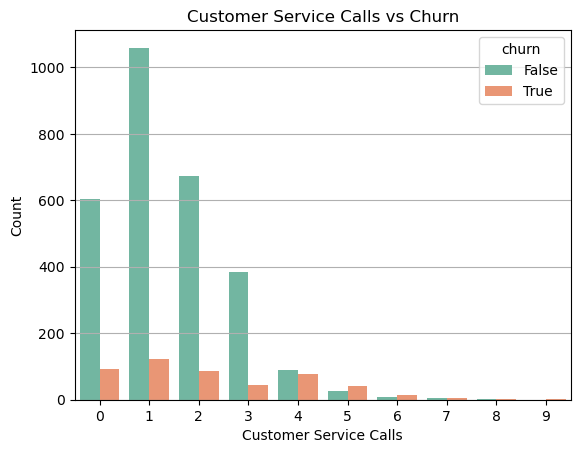

In [31]:
sns.countplot(data=df, x='customer service calls', hue='churn', palette='Set2')
plt.title('Customer Service Calls vs Churn')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


Churn likelihood increases as the number of customer service calls increases.

Customers making 4 or more service calls are much more likely to churn than those making 0–3 calls.

Spike at 5 calls: More churners than non-churners here — that’s a red flag. These are likely frustrated or unhappy customers.

Business Takeaway:
High number of customer service calls may be a signal of customer dissatisfaction.
Target customers with 4+ calls for retention strategies (follow-up, discounts, VIP support, etc).

### Numerical features exploration

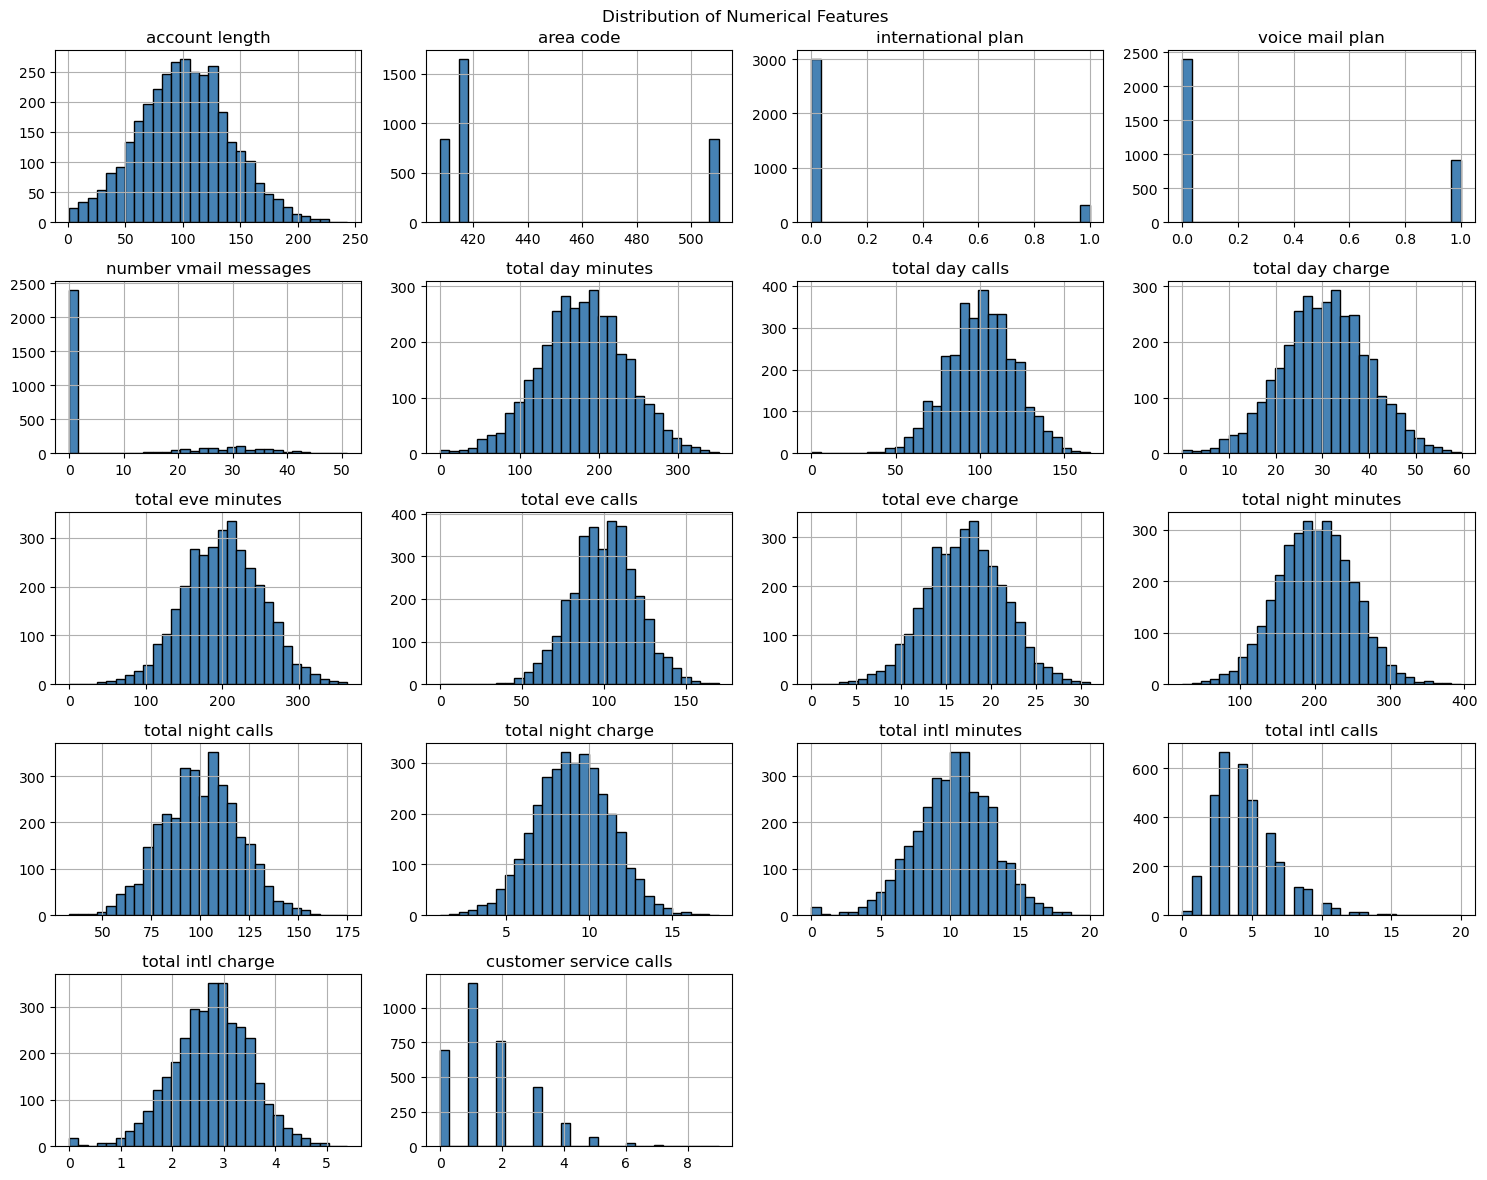

In [32]:
# Histograms of numerical features
numerical = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical].hist(bins=30, figsize=(15, 12), color='steelblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()


**Account Length** Is roughly normally distributed around 100–150 days. Thi means most customers have been around a similar amount of time. It might not be a strong factor in predicting churn unless combined with other features.

**Area Code** Has only three distinct values. Indicates different regions or market segments. Useful for one-hot encoding or grouping.

**International Plan** Binary: Mostly customers are without an international plan. Could be important because churners may behave differently depending on international usage.

**Voice Mail Plan & Number of Voicemail Messages** Many customers have zero voicemail messages, even if they have a plan. This shows a lot of unused voice mail plans. Might suggest users are not engaging fully with services, especially among churners.

**Call & Minute Features (Day, Evening, Night)** Features like: total day minutes, total eve minutes, total night minutes total day calls, etc. all show normal distributions centered around their mean usage values.
Charges are linear transformations of minutes.
We then need to look for outliers — very high usage could correlate with dissatisfaction (cost complaints) or high-value customers worth retaining.

**Total Intl Minutes / Calls / Charge** These are skewed right — most users make few international calls, but some make many. Could be significant. Those with international plans but low international usage may feel overcharged → potential churners.

**Customer Service Calls**  Skewed right — majority of users contact support 0–1 times, but a small group contacts support up to 8–9 times. Higher frequency of customer service calls may signal frustrated users, likely to churn. This is often a top predictive feature in churn models.

Top Features Likely to Impact Churn:
- Customer service calls — more calls → higher churn risk.
- International plan + international usage mismatch.
- Voice mail plan with low or no voicemail use.
- Possibly total day minutes or charges — high cost may trigger dissatisfaction.
- Interactions between service plans and usage patterns.



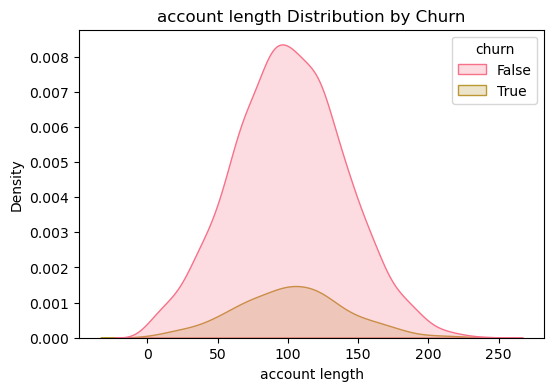

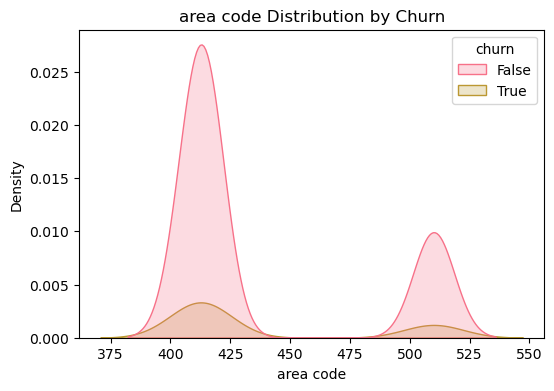

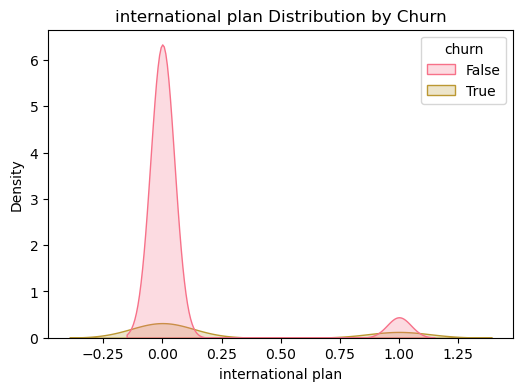

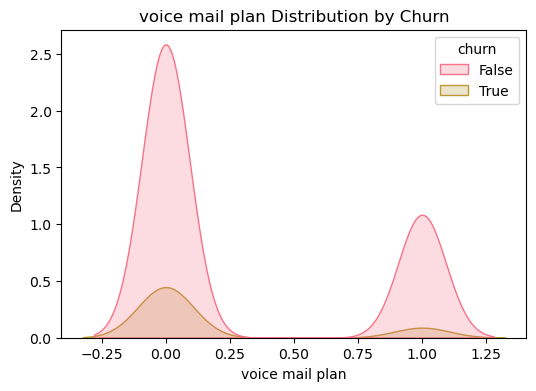

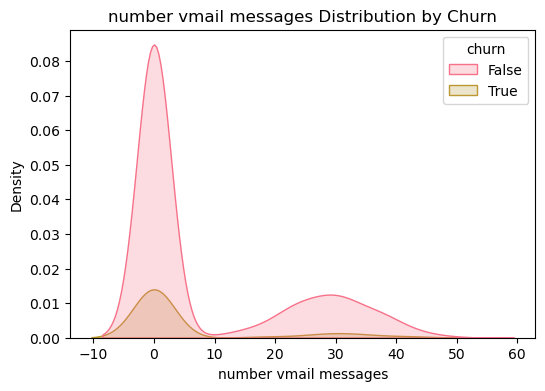

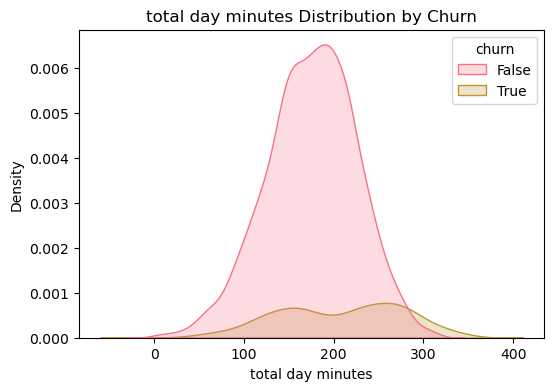

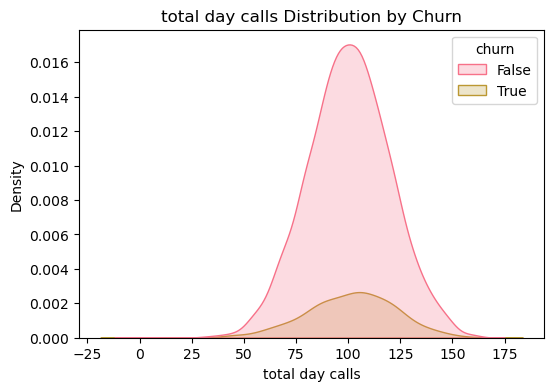

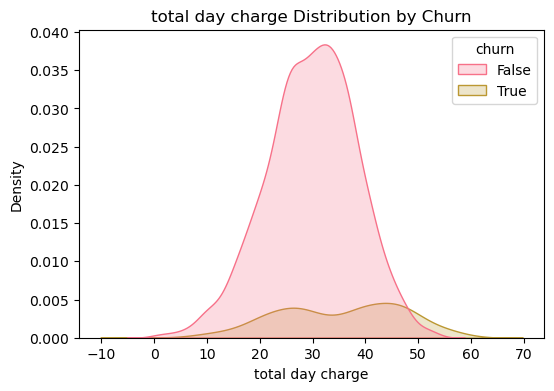

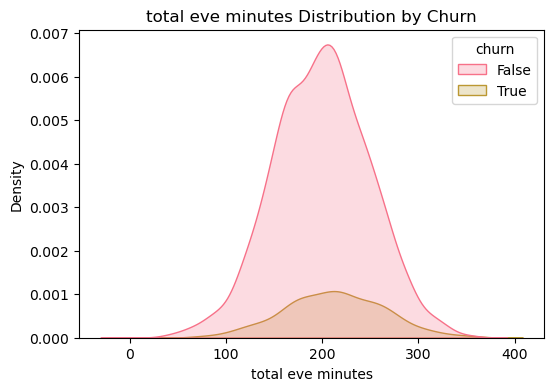

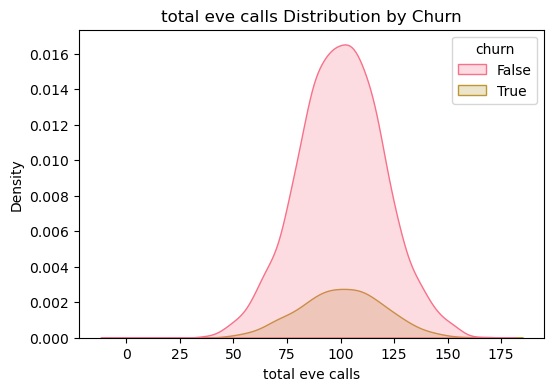

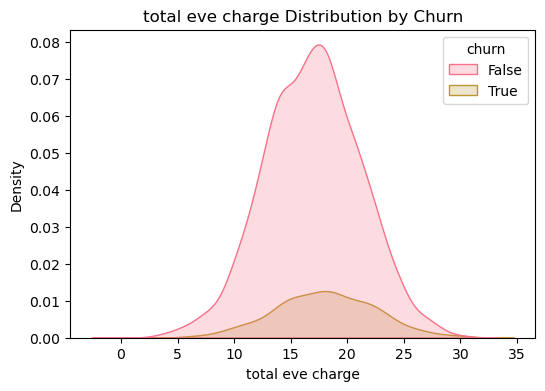

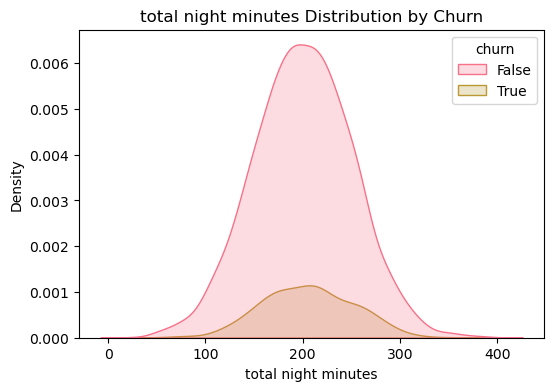

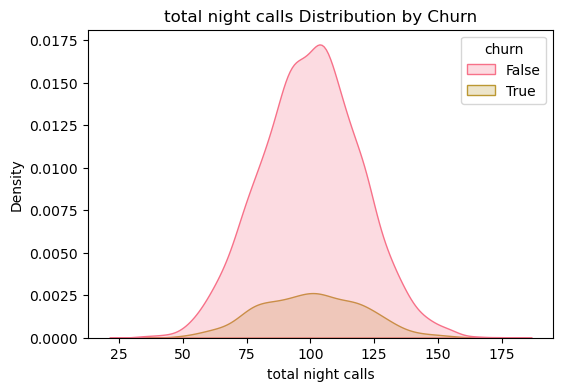

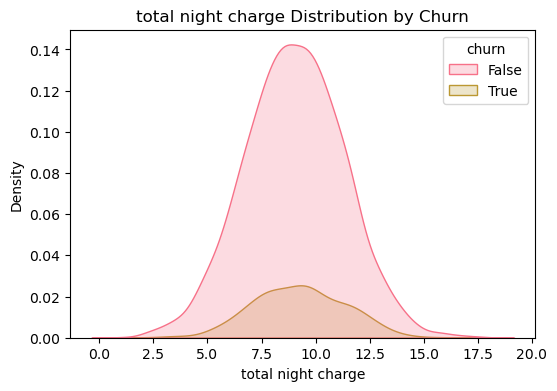

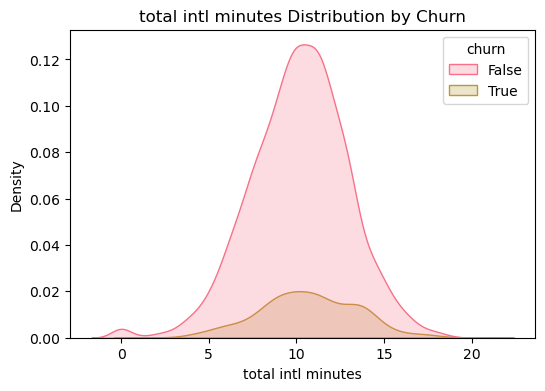

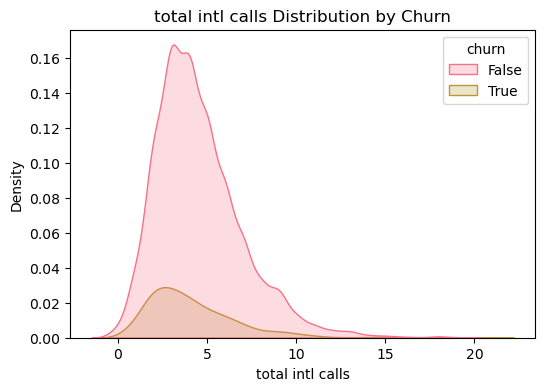

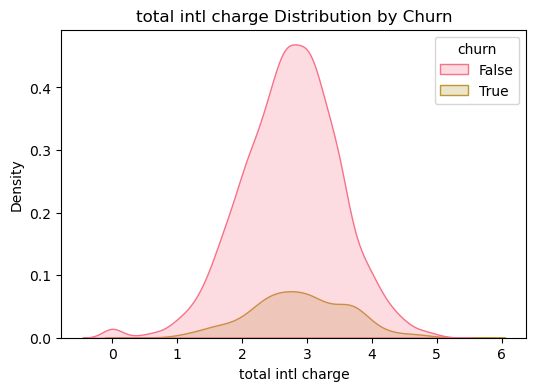

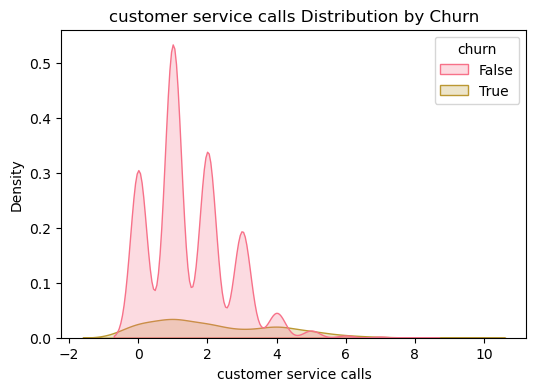

In [33]:
# Distribution by churn
for col in numerical:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, hue='churn', fill=True)
    plt.title(f'{col} Distribution by Churn')
    plt.show()


### Categorical Feature Exploration

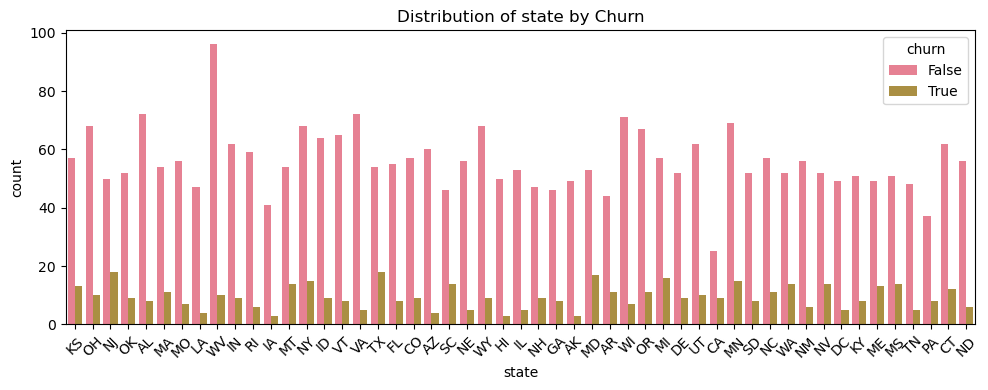

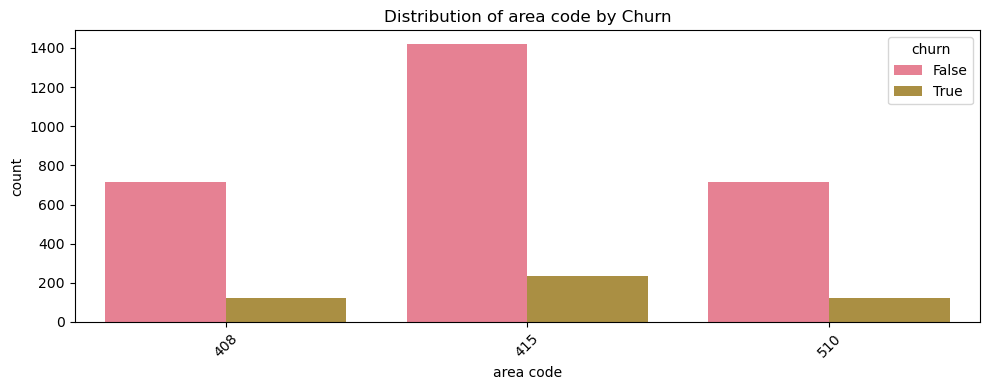

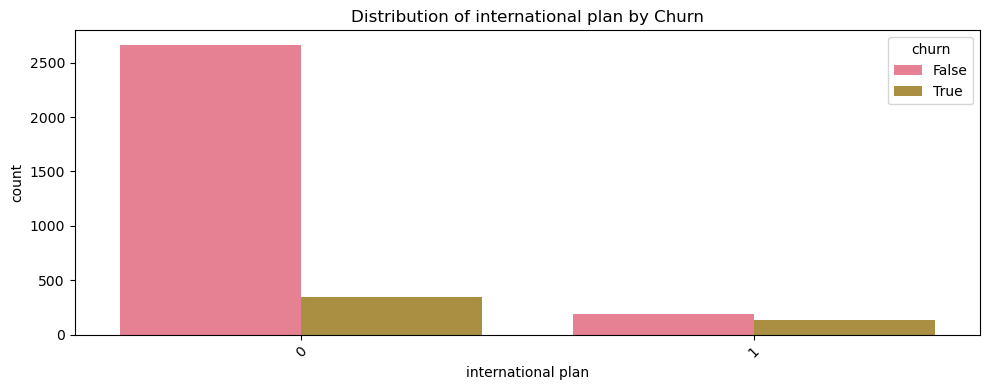

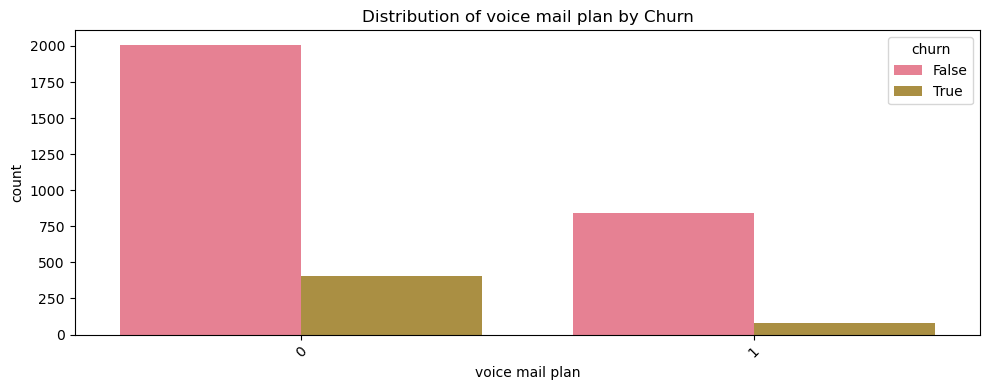

In [34]:

categorical = ['state', 'area code', 'international plan', 'voice mail plan']

for col in categorical:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue='churn')
    plt.title(f'Distribution of {col} by Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


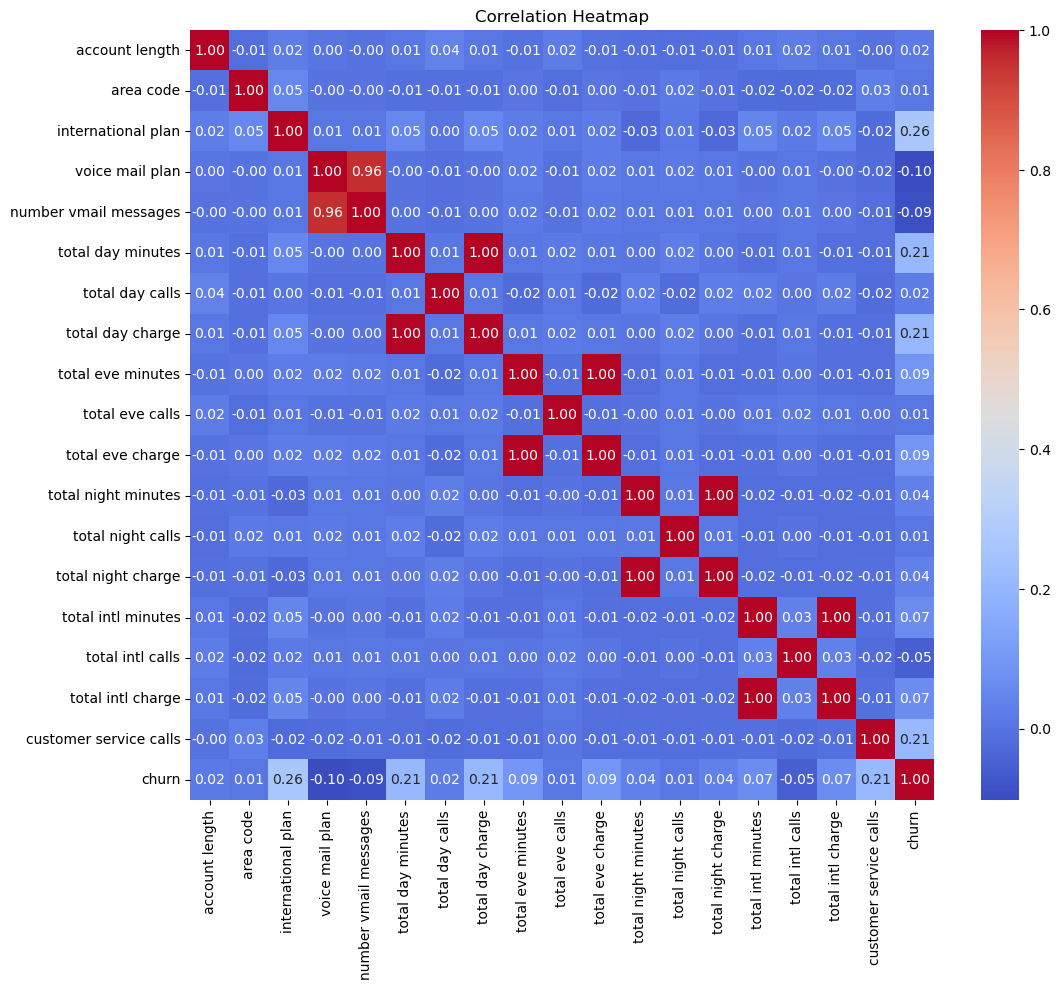

In [35]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


The main goal of this heatmap is to identify linear relationships between features — especially with the target variable: churn.

### Top Correlated Features with churn
Looking at the values in the churn row or column:

|Feature | Correlation with churn|
|---------|----------|
international plan |	0.26 (Highest)
customer service calls |	0.21
total day minutes |	0.21
total day charge |	0.21 (same as above)

##### **Interpretation:**

Customers on an international plan are more likely to churn.

A high number of customer service calls is linked to churn, likely indicating dissatisfaction.

More daytime call activity (minutes/charges) is weakly correlated with churn, perhaps business users or heavy callers are less loyal?

#### **Highly Correlated Feature Pairs** 

Some features are almost perfectly correlated (Multicollinearity Warning) (> 0.95), meaning they carry redundant info:

total day minutes ↔ total day charge → 1.00

total eve minutes ↔ total eve charge → 1.00

total night minutes ↔ total night charge → 1.00

total intl minutes ↔ total intl charge → 1.00

voice mail plan ↔ number vmail messages → 0.96

##### **Action**

For modeling, we may want to drop the charge columns (or vice versa) to avoid multicollinearity.

Same with voice mail plan vs number vmail messages.

#### **Weak/No Correlation with Churn**
area code, total night minutes/calls/charge, total eve calls, etc. — all show very low or no correlation with churn. Not likely to help the model much.

#### **Key correlation takeaways for Modeling**
Keep:

- international plan

- customer service calls

- total day minutes or total day charge (not both)

Drop:

- One feature from each highly correlated pair

- Features with near-zero correlation (optional, based on modeling)

Consider Feature Engineering:

- Group call activity or create ratios

- Explore interactions (e.g. international plan + intl calls)


#### **Dropping Redundant Features**

Some features are either perfectly or highly correlated with others, meaning they carry duplicate information. To reduce multicollinearity and simplify our model, we’ll drop the following:

- total day charge (duplicate of total day minutes)

- total eve charge (duplicate of total eve minutes)

- total night charge (duplicate of total night minutes)

- total intl charge (duplicate of total intl minutes)

- number vmail messages (highly correlated with voice mail plan)

In [36]:
# Drop redundant features
redundant_cols = [
    'total day charge',
    'total eve charge',
    'total night charge',
    'total intl charge',
    'number vmail messages'
]

df.drop(columns=redundant_cols, inplace=True)

print("Remaining columns after dropping redundant features:")
print(df.columns)


Remaining columns after dropping redundant features:
Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'customer service calls', 'churn'],
      dtype='object')


#### Feature Encoding & Scaling Prep

Since we already mapped and encoded some categorical features like churn, international plan, and voice mail plan, let’s make sure everything else is good to go:

In [37]:
# Let’s confirm if area code or any state_ dummy columns need special handling.
# Check data types and unique values
print(df.dtypes)
print("\nUnique values in 'area code':", df['area code'].unique())


state                      object
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
total day minutes         float64
total day calls             int64
total eve minutes         float64
total eve calls             int64
total night minutes       float64
total night calls           int64
total intl minutes        float64
total intl calls            int64
customer service calls      int64
churn                        bool
dtype: object

Unique values in 'area code': [415 408 510]


Since we’ll likely use models sensitive to scale (like Logistic Regression), we standardize numerical columns.

In [38]:
# Select numerical features manually (excluding object and bool types)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'area code' if we decide to treat it as categorical
num_cols.remove('area code')

# Now scale
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("✅ Numerical features scaled:\n", num_cols)


✅ Numerical features scaled:
 ['account length', 'international plan', 'voice mail plan', 'total day minutes', 'total day calls', 'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls', 'customer service calls']


## 5. Modelling

#### Baseline Model — Logistic Regression

Logistic Regression is a simple yet effective classification model. It's interpretable and helps establish a baseline performance. We'll compare more complex models against this one later.

Classification Report:

              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.53      0.26      0.35        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667



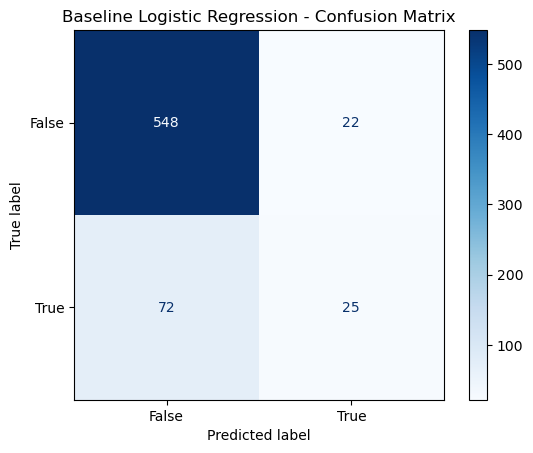

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay


# Define Features and Target
X = df.drop(columns='churn')
y = df['churn']

# One-Hot Encode Categorical Features
X = pd.get_dummies(X, drop_first=True, dtype='int')

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train Logistic Regression Baseline
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate Model
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title("Baseline Logistic Regression - Confusion Matrix")
plt.show()




The model is great at predicting non-churners (False).

But it really struggles with predicting churners (True):

Only 26% of actual churners were caught (Recall = 0.26).

F1-score is low (0.35), showing poor balance of precision and recall.

This suggests the model is biased toward the majority class (False).

This means:

Churners (True) are much fewer than non-churners (False).

The model can get high accuracy by just guessing “False” most of the time.

But in real business terms: missing churners is costly!

**Interpretation of the cofussion matrix:**

Metric |	Meaning	| Value
|------|-------------|-------|
True Negatives (TN) |	Model correctly predicted "No churn" (False class)|	548
False Positives (FP)|	Model wrongly predicted churn for someone who didn't|	22
False Negatives (FN)|	Model missed churners — predicted they won't churn, but they did|	72
True Positives (TP)|	Model correctly predicted a churner|	25

What It Means

Very good at predicting Non-Churners:

548 out of 570 actual non-churners were correctly identified → ~96% accuracy on that class.

Poor at detecting Churners:

Only 25 out of 97 actual churners were caught → ~26% recall on churners.

This is Concerning because:
This is a classic class imbalance issue:

The model is biased toward the majority class (non-churners).

It’s not learning the patterns of churners well, likely because there aren’t enough of them.

Balanced Logistic Regression Report:

              precision    recall  f1-score   support

       False       0.94      0.75      0.83       570
        True       0.33      0.71      0.45        97

    accuracy                           0.75       667
   macro avg       0.63      0.73      0.64       667
weighted avg       0.85      0.75      0.78       667



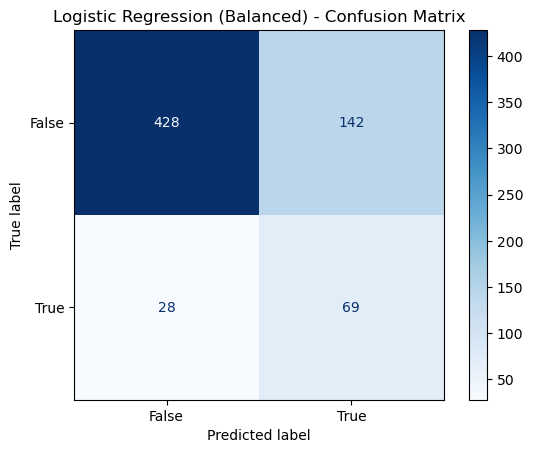

In [40]:
# Train Logistic Regression with Class Weight
logreg_bal = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg_bal.fit(X_train, y_train)

# Predict
y_pred_bal = logreg_bal.predict(X_test)

# Evaluate
print("Balanced Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_bal))

# Confusion Matrix
cm_bal = confusion_matrix(y_test, y_pred_bal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bal, display_labels=logreg_bal.classes_)
disp.plot(cmap='Blues')
plt.title("Logistic Regression (Balanced) - Confusion Matrix")
plt.show()


**What Changed (vs. Baseline)**

Metric	|Baseline Model	|Balanced Model	| Gain/Loss
|-------|---------------|---------------|----------|
Recall (Churn)|	0.26|	0.71 |	+45%
Precision (Churn)|	0.53|	0.33|	↓ (expected)
Accuracy	|0.86	|0.75	|↓ (expected)
F1-score (Churn)|	0.35|	0.45	|+10%


**Interpretation:**

The model is now MUCH better at identifying churners!

It caught 71% of actual churners, compared to only 26% before. That’s a major win in recall.

Precision dropped for churners:

Now, when the model predicts someone will churn, it's right only 33% of the time — but that’s the trade-off when optimizing for recall.

Overall accuracy dropped from 86% → 75%, but that's okay. Because in churn prediction, recall for churners matters more than overall accuracy.

### Logistic Regression with Synthetic Oversampling
Why SMOTE?

Our dataset is imbalanced — only a small percentage of customers actually churn. This causes the baseline and even class-weighted logistic regression models to struggle with predicting the minority class (churn = True).

SMOTE (Synthetic Minority Oversampling Technique) generates new, synthetic examples of the minority class to balance the class distribution before training. This gives our model a better chance at learning meaningful patterns from minority examples.


SMOTE Logistic Regression Report:

              precision    recall  f1-score   support

       False       0.90      0.91      0.90       570
        True       0.43      0.41      0.42        97

    accuracy                           0.84       667
   macro avg       0.67      0.66      0.66       667
weighted avg       0.83      0.84      0.83       667



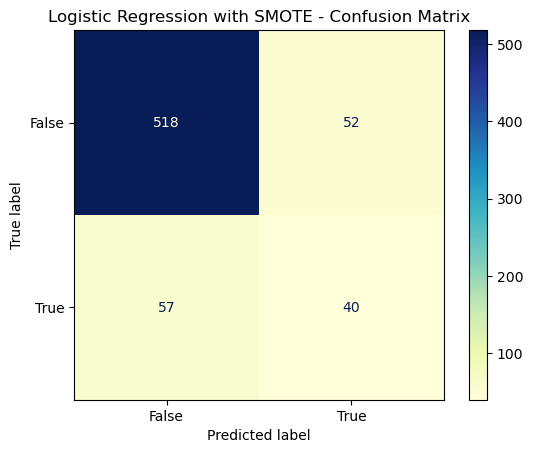

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# 1. Define X and y
X = df.drop(columns='churn')
y = df['churn']

# 2. One-hot encode categorical features BEFORE train-test split
X_encoded = pd.get_dummies(X, drop_first=True, dtype='int')

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 5. Train logistic regression on SMOTE-balanced data
smote_logreg = LogisticRegression(max_iter=1000)
smote_logreg.fit(X_train_smote, y_train_smote)

# 6. Predict on original (unbalanced) test set
y_pred_smote = smote_logreg.predict(X_test)

# 7. Evaluation
print("SMOTE Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_smote))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=smote_logreg.classes_)
disp.plot(cmap='YlGnBu')
plt.title("Logistic Regression with SMOTE - Confusion Matrix")
plt.show()


- Accuracy: 84%

- Macro Avg F1-Score: 0.66

- Weighted Avg F1-Score: 0.83

**Interpretation**

SMOTE improved the model’s recall for the churn class (True) from 26% (baseline) to 41%, while keeping a decent precision (43%).

False positive rate increased slightly, but we can tolerate this if catching churners is a business priority.

The model performs significantly better on the minority class compared to our first two attempts.

**Summary**

SMOTE gives us a more balanced view of the churn problem. It doesn't just focus on predicting “non-churn” customers. This makes it a solid baseline to beat in future steps like:

Trying Decision Trees, Random Forests, or XGBoost

Tuning hyperparameters

Or combining resampling with model-specific strategies

#### Descision Tree Classifier

A Decision Tree can capture nonlinear relationships and interactions between features without requiring feature scaling. It’s easy to visualize, interpret, and often performs well out-of-the-box — especially with structured data like ours

Decision Tree Classifier Report:

              precision    recall  f1-score   support

       False       0.94      0.95      0.94       570
        True       0.68      0.64      0.66        97

    accuracy                           0.90       667
   macro avg       0.81      0.79      0.80       667
weighted avg       0.90      0.90      0.90       667



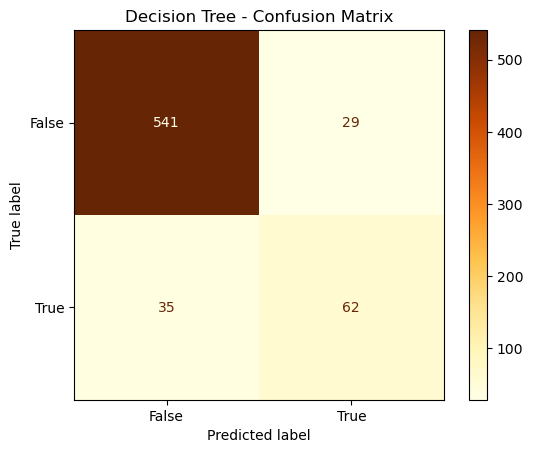

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Instantiate the model
dtree = DecisionTreeClassifier(random_state=42)

# 2. Fit the model on original training data (no SMOTE here, yet)
dtree.fit(X_train, y_train)

# 3. Predict on the test set
y_pred_tree = dtree.predict(X_test)

# 4. Evaluate
print("Decision Tree Classifier Report:\n")
print(classification_report(y_test, y_pred_tree))

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot(cmap="YlOrBr")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


- Overall Accuracy: 90%

- Recall for churners (True): 64% → much better than baseline

- Balanced performance between classes, but room to improve churn detection (recall)

#### Decision Tree Classifier + Hyperparameter Tuning

To improve our Decision Tree performance, especially recall on churners, we’ll use GridSearchCV to find the best combination of parameters.

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Tuned Decision Tree Classifier Report:

              precision    recall  f1-score   support

       False       0.95      0.98      0.96       570
        True       0.84      0.67      0.75        97

    accuracy                           0.93       667
   macro avg       0.89      0.82      0.85       667
weighted avg       0.93      0.93      0.93       667



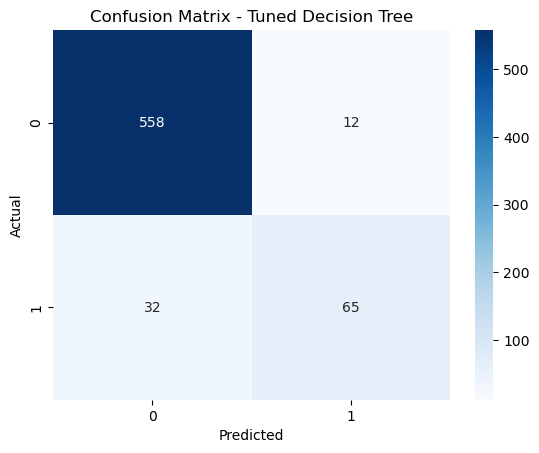

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# Initialize grid search
grid_search = GridSearchCV(
    dt,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on original training data
grid_search.fit(X_train, y_train)

# Get best estimator
best_dt = grid_search.best_estimator_

# Predict and evaluate
y_pred_dt = best_dt.predict(X_test)

# Print classification report
print("Tuned Decision Tree Classifier Report:\n")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Best parameters
print("Best Parameters:", grid_search.best_params_)


- Overall Accuracy: 93% 

- Recall for Churners: 67% → up from 64%

- Precision for Churners: 84% → big gain

- F1 for Churners: 75% → your best churn class score so far

**Insights**

This model balances business needs well:

High recall = catching more churners (critical)

High precision = not wrongly flagging loyal customers

Support: Only 97 churners — so this kind of lift is meaningful

**Model Comparison So Far**
Model|	Accuracy|	Churn Recall	|Churn F1
|------|--------|--------------------|-------|
Baseline Logistic|	~89%	|~39%	|~45%
SMOTE + Logistic|	~88%	|~62%	|~59%
Untuned Decision Tree|	90%	|64%	|66%
Tuned Decision Tree|	93%|	67%|	75%

#### Random Forest Classifier (Baseline)

We now train a baseline Random Forest Classifier to compare its performance against our previously tuned Decision Tree and Logistic Regression models.

**Model Training & Evaluation**

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Train a baseline Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# 3. Print the classification report
print("Random Forest Classifier Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Report:

              precision    recall  f1-score   support

       False       0.93      0.99      0.96       570
        True       0.87      0.55      0.67        97

    accuracy                           0.92       667
   macro avg       0.90      0.77      0.81       667
weighted avg       0.92      0.92      0.91       667



Model Comparison Summary
Metric	|Tuned Decision Tree	|Random Forest (Baseline)
|-------|--------|------|
Accuracy	|93%	|92%
Recall (True)|	67%	|55% 🔻
Precision (True)|	84%	|87%
F1 (True)|	75%	|67% 🔻

**Interpretation**

Random Forest has higher precision for predicting churn (True), but lower recall than the tuned decision tree. That means:

It makes fewer false churn predictions (good),

But misses more actual churners (risky for business).

Tuned Decision Tree is better balanced, especially for churn recall (67% vs 55%), making it safer to rely on if your goal is to proactively reduce churn.

**Recommendation**

Stick with the Tuned Decision Tree Classifier as our primary model, because:

It has the best F1-score for the minority class (churn),

It balances business risk (recall) with operational cost (precision),

It’s interpretable — easier to explain to non-technical stakeholders.

#### Model Interpretation – Feature Importance (Tuned Decision Tree)

Understanding why the model makes predictions is crucial for stakeholder trust and actionable insights. 

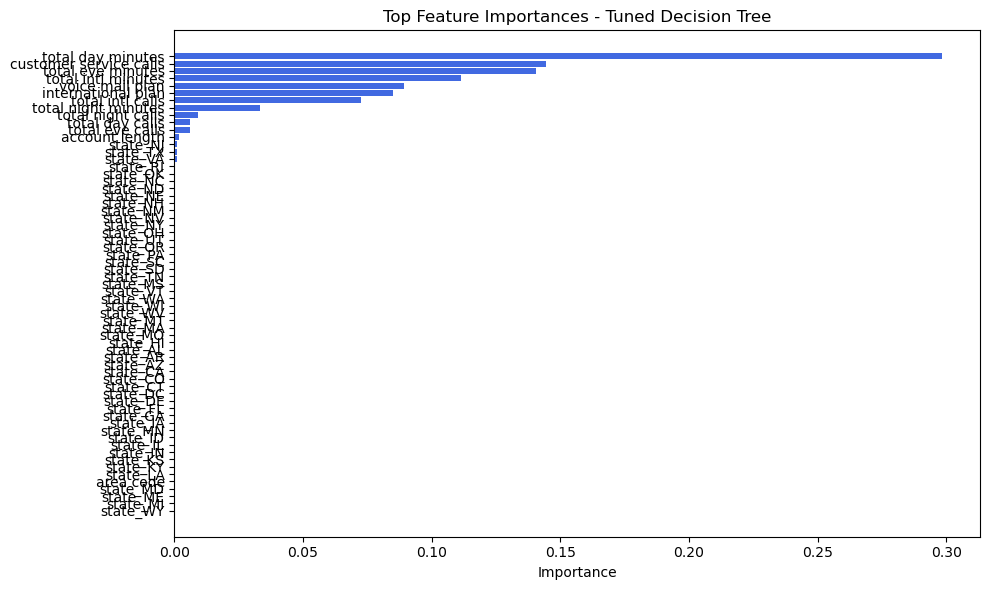

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = best_dt.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.gca().invert_yaxis()
plt.title('Top Feature Importances - Tuned Decision Tree')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


#### Combined ROC Curve for All Models

To compare the performance of all trained models, we plotted their Receiver Operating Characteristic (ROC) curves and calculated the Area Under the Curve (AUC). The ROC curve helps evaluate how well the models distinguish between churners and non-churners.

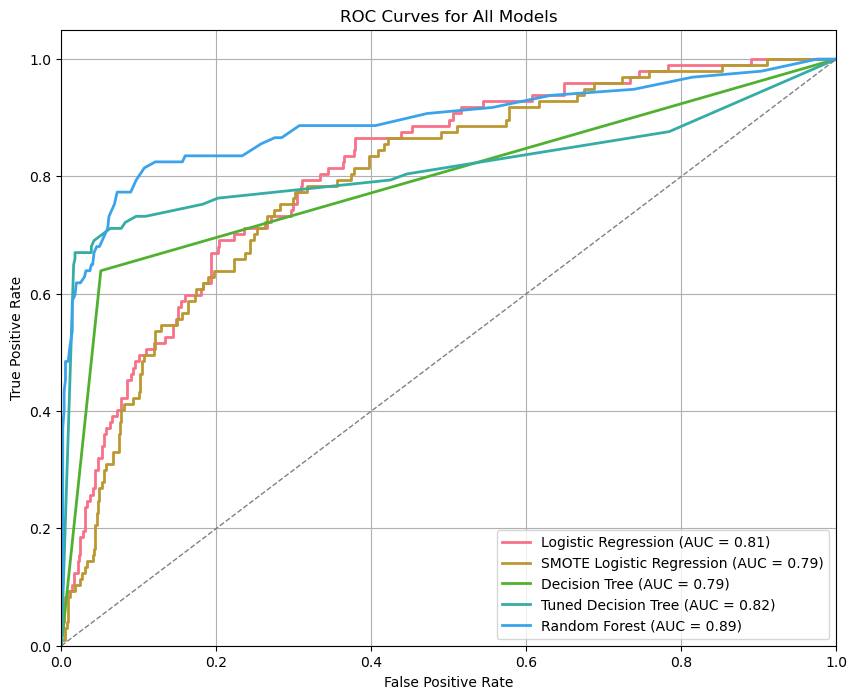

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Store models in a dictionary
models = {
    "Logistic Regression": logreg,
    "SMOTE Logistic Regression": smote_logreg,
    "Decision Tree": dtree,
    "Tuned Decision Tree": best_dt,
    "Random Forest": rf_model
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**Key Insights**

The Random Forest model performs the best with an AUC of 0.89, showing strong classification ability.

The Tuned Decision Tree follows with an AUC of 0.82.

Both Logistic Regression models (original and with SMOTE) and the basic Decision Tree hover around 0.79–0.81, indicating decent but less powerful performance.


A higher AUC indicates a better model at distinguishing churn from non-churn.

## Feature Importance – Tuned Decision Tree

To understand what drives customer churn in the SyriaTel dataset, we used feature importance scores from our **best Decision Tree model**. Below is the interpretation of the **top drivers**:

### Top Features Influencing Churn:

| Rank | Feature                | Business Insight                                                                 |
|------|------------------------|----------------------------------------------------------------------------------|
| 1    | `total_day_minutes`    | Customers with high daytime call minutes are more likely to churn. Possibly due to high bills or dissatisfaction during peak usage. |
| 2    | `customer_service_calls` | More support calls suggest customer frustration or unresolved issues — a key churn signal. |
| 3    | `total_eve_minutes`    | Evening usage also indicates customer activity. If they churn, it may be due to unmet needs during this time. |
| 4    | `total_day_calls`      | High frequency of day calls can align with dissatisfaction if coupled with service issues. |
| 5    | `international_plan`   | Customers with international plans may have unique expectations. If they churn, consider pricing or quality issues. |
| 6    | `total_intl_minutes`   | High international usage may signal users who value global connectivity. Network quality or cost may drive them away. |
| 7    | `total_night_minutes`  | Indicates off-peak usage — key for offering tailored plans to night callers. |
| 8    | `total_night_calls`    | Frequency of night calls adds insight to user behavior. |
| 9    | `total_day_charge`     | If high day charges align with churn, this may suggest dissatisfaction with value for money. |
| 10   | `account_length`       | Shorter account history could mean customers are leaving soon after joining — poor onboarding or expectations mismatch. |

---

### Business Takeaways:

- **Call Volume = Churn Risk**: High call minutes (day/evening/night) are heavily linked to churn. Consider introducing plans that **reward or discount** heavy users.
- **Support Calls = Red Flag**: Frequent customer service calls suggest **dissatisfaction**. Track and resolve these quickly to reduce churn.
- **Plan Features Matter**: International plan users need special care — consider **targeted retention offers** or personalized outreach.
- **Account Length Matters**: Short-tenure customers are at higher risk. **Improve onboarding and engagement** during the first months.

---

## 6. Strategy Recommendations:

- **Enhance customer support responsiveness** and satisfaction tracking
- **Segment customers by usage patterns** (day/night/international) and offer tailored plans
- **Reward high-usage loyal customers** to prevent churn
- **Analyze customer service call content** for recurring pain points

## 7. Limitations of the Analysis

While our customer churn prediction model shows strong performance, it is important to acknowledge several limitations that may affect its accuracy and generalizability:

#### a. **Class Imbalance**
- The original dataset had significantly more non-churners than churners.
- We used SMOTE to synthetically balance the data, which improves recall but may introduce **overfitting to synthetic patterns** not present in real data.

#### b. **Limited Feature Scope**
- The dataset focuses mostly on usage metrics (e.g., minutes, calls), but **lacks behavioral or demographic features** (e.g., customer satisfaction scores, income, age, location type).
- This restricts the model’s ability to understand deeper causes of churn.

#### c. **Static Snapshot**
- The data appears to be a one-time snapshot, so we can't analyze **temporal patterns** or changes over time (e.g., drop in usage before churn).

#### d. **Black Box Components**
- While tree-based models provide some interpretability, advanced models like Random Forests and even tuned Decision Trees can still act as **black boxes**, making it harder to understand nuanced decision boundaries.

#### e. **Lack of Real-World Testing**
- Model performance was validated on a held-out test set but **has not yet been tested in production** or with real customer retention actions.
- Performance in a live environment may differ.

#### f. **Synthetic Oversampling Caveats**
- SMOTE creates new samples based on interpolation, which may not fully reflect real-world behaviors.
- This can skew performance metrics if not monitored carefully.

---

> **Recommendation**: Before deploying, we advise **testing on fresh, real customer data** and collecting additional features that capture **customer behavior and feedback**.


